## Data Collection & Preprocessing

In [2]:
# Checking the packages
! pip install numpy
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
# Loading the dataset

headers = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 
           'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 
           'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
           'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
           'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count', 'dst_host_same_srv_rate', 
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
           'dst_host_srv_rerror_rate', 'label']

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.data_10_percent.gz",
                  header=None, names=headers, na_values="?" )
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.shape

(494021, 42)

In [6]:
# Checking missing values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  lnum_compromised             494021 non-null  int64  
 13 

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Preprocessing the dataset
from sklearn import preprocessing

# Min max scaling
num_features =  df.select_dtypes(include=np.number).columns.tolist()[:-1]
df[num_features] = preprocessing.MinMaxScaler().fit_transform(df[num_features])

# Label encoding 
LE = preprocessing.LabelEncoder()
df['label'] = LE.fit_transform(df['label'])
df['protocol_type'] = LE.fit_transform(df['protocol_type'])
df['service'] = LE.fit_transform(df['service'])
df['flag'] = LE.fit_transform(df['flag'])

In [10]:
# Train Test Split the dataset
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42) 

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (345814, 41) (345814,)
Test set: (148207, 41) (148207,)


In [11]:
# validation = df
# validation['label'] = validation['protocol_type'].apply(lambda x: True if x in df else False)
# validation = validation[validation['label'] == True].reset_index()
# df

In [12]:
# # validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state= 8)

# print('validation set', y_train.shape, y_test.shape)

## Feature Selection Using Random Forest

In [13]:
# Feature Selection using RFC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

input = [('scaler', StandardScaler()), ('pca', PCA()), ('rfc',(RandomForestClassifier(n_estimators = 5, random_state=42)))]
PIPE = Pipeline(input)
PIPE.fit(X_train, y_train)

data = []
for feature in zip(headers, PIPE['rfc'].feature_importances_):
  temp = list(feature).copy()
  data.append(temp)

feature_df = pd.DataFrame(data, columns = ['Feat_Imp', 'Value'])
feature_df.head()

,Feat_Imp,Value
0,duration,0.158684
1,protocol_type,0.083670
2,service,0.117312
3,flag,0.176317
4,src_bytes,0.173229


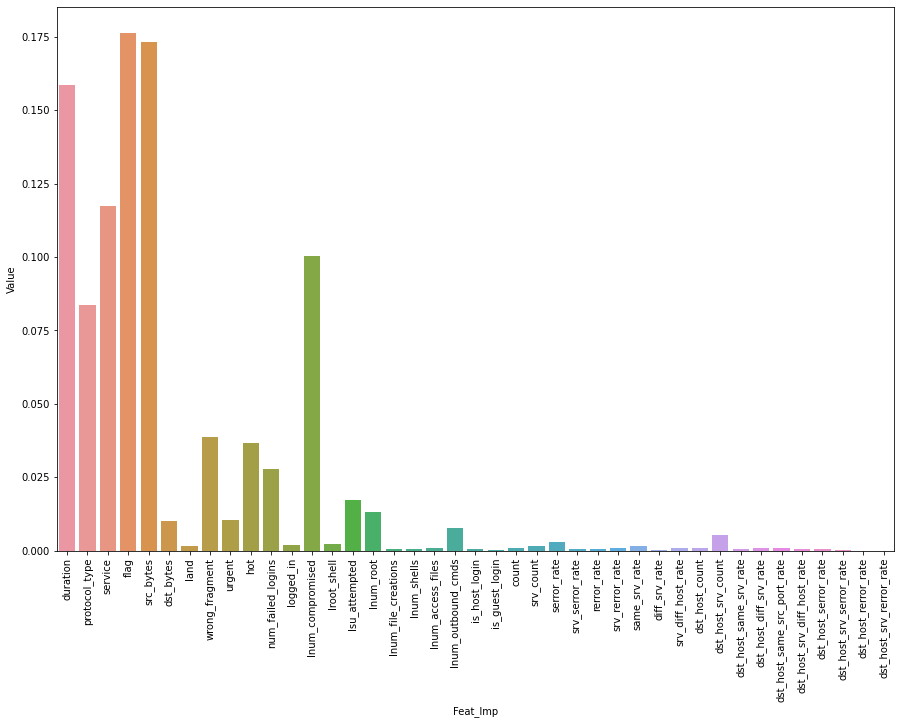

In [14]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = 'Feat_Imp', y = 'Value', data = feature_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [15]:
# Feature Selection using RFC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

input = [('scaler', StandardScaler()), ('pca', PCA()), ('Srfc', SelectFromModel(RandomForestClassifier(n_estimators = 5, random_state=42)))]
PIPE = Pipeline(input)
PIPE.fit(X_train, y_train)

for feature in PIPE['Srfc'].get_support(indices = True):
    print(headers[feature])

duration
protocol_type
service
flag
src_bytes
wrong_fragment
hot
num_failed_logins
lnum_compromised


In [16]:
# Train Test Split of rfc features
from sklearn.model_selection import train_test_split

X1 = df[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'wrong_fragment','hot', 'num_failed_logins', 'lnum_compromised']]
y1 = df.iloc[:, -1].values
X_train1, X_test1, y_train1, y_test1  = train_test_split(X1, y1, test_size=0.3, random_state=42) 

print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (345814, 9) (345814,)
Test set: (148207, 9) (148207,)


## Machine Learning Algorithms

In [ ]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier
from time import time

# Fitting into model
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
start = time()
DT.fit(X_train1, y_train1)
yhat_dt = DT.predict(X_test1)
print(f'Time taken to run: {time() - start} seconds')

print('Train score: %.2f' %  DT.score(X_train1, y_train1))
print('Test score: %.2f' % DT.score(X_test1, y_test1))

# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
print('Accuracy: %.2f' % accuracy_score(yhat_dt, y_test1))
print('Precision: %.2f' % precision_score(yhat_dt, y_test1, average="weighted"))
print('Recall: %.2f' % recall_score(y_test1, yhat_dt, average="weighted"))
print('F1-score: %.2f' % f1_score(y_test1, yhat_dt, average='weighted'))

Time taken to run: 0.18696236610412598 seconds
Train score: 0.99
Test score: 0.99
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-score: 0.98


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from time import time

RFC = RandomForestClassifier(n_estimators = 5, random_state=42)
start = time()
RFC.fit(X_train1, y_train1)
yhat_rfc = RFC.predict(X_test1)
print(f'Time taken to run: {time() - start} seconds')

print('Train score: %.2f' % RFC.score(X_train1, y_train1))
print('Test score: %.2f' % RFC.score(X_test1, y_test1))

# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
print('Accuracy: %.2f' % accuracy_score(yhat_rfc, y_test1))
print('Precision: %.2f' % precision_score(yhat_rfc, y_test1, average="weighted"))
print('Recall: %.2f' % recall_score(y_test1, yhat_rfc, average="weighted"))
print('F1-score: %.2f' % f1_score(y_test1, yhat_rfc, average='weighted'))

Time taken to run: 0.8835928440093994 seconds
Train score: 1.00
Test score: 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
## SVM
from sklearn.svm import SVC
from time import time

# Fitting into model
SVM = SVC(kernel = 'rbf')
start = time()
SVM.fit(X_train1, y_train1) 
yhat_svm = SVM.predict(X_test1)
print(f'Time taken to run: {time() - start} seconds')

# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
print('Accuracy: %.2f' % accuracy_score(yhat_svm, y_test1))
print('Precision: %.2f' % precision_score(yhat_svm, y_test1, average="weighted"))
print('Recall: %.2f' % recall_score(y_test1, yhat_svm, average="weighted"))
print('F1-score: %.2f' % f1_score(y_test1, yhat_svm, average='weighted'))

Time taken to run: 447.1158037185669 seconds
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-score: 0.98


In [ ]:
## Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB
from time import time

NB = GaussianNB()
start = time()
NB.fit(X_train1, y_train1)
yhat_nb = NB.predict(X_test1)
print(f'Time taken to run: {time() - start} seconds')

# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
print('Accuracy: %.2f' % accuracy_score(yhat_nb, y_test1))
print('Precision: %.2f' % precision_score(yhat_nb, y_test1, average="weighted"))
print('Recall: %.2f' % recall_score(yhat_nb, y_test1, average="weighted"))
print('F1-score: %.2f' % f1_score(yhat_nb, y_test1, average='weighted'))

Time taken to run: 0.4758129119873047 seconds
Accuracy: 0.79
Precision: 0.83
Recall: 0.79
F1-score: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## KNN
from sklearn.neighbors import KNeighborsClassifier 
from time import time

# Building model with k=7
k = 7
NEIGH = KNeighborsClassifier(n_neighbors = k)
start = time()
NEIGH.fit(X_train1,y_train1)
yhat_knn = NEIGH.predict(X_test1)
print(f'Time taken to run: {time() - start} seconds')

print('Train score: %.2f' % NEIGH.score(X_train1, y_train1))
print('Test score: %.2f' % NEIGH.score(X_test1, y_test1))

# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
print('Accuracy: %.2f' % accuracy_score(yhat_knn, y_test1))
print('Precision: %.2f' % precision_score(yhat_knn, y_test1, average="weighted"))
print('Recall: %.2f' % recall_score(y_test1, yhat_knn, average="weighted"))
print('F1-score: %.2f' % f1_score(y_test1, yhat_knn, average='weighted'))

Time taken to run: 605.1131446361542 seconds
Train score: 1.00
Test score: 1.00
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [26]:
# # k-fold cross-validation
# from numpy import array
# from sklearn.model_selection import KFold

# # KF= KFold(n_splits=2, random_state=8, shuffle=True)
# # print(KFOLD)
# kf = KFold(n_splits=2)
# kf.get_n_splits(X)

# for train, test in kf.split(X):
# 	print('train: %s, test: %s' % (df[X_train], df[y_test]))

KeyError: ignored

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds
scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


Cross Validation accuracy scores: [0.9912093  0.98938754 0.99037071 0.99080446 0.99057286 0.99091987
 0.99112229 0.9909777  0.99109337 0.98898239]
Cross Validation accuracy: 0.991 +/- 0.001
